In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
T = np.linspace(0, 1, 100)

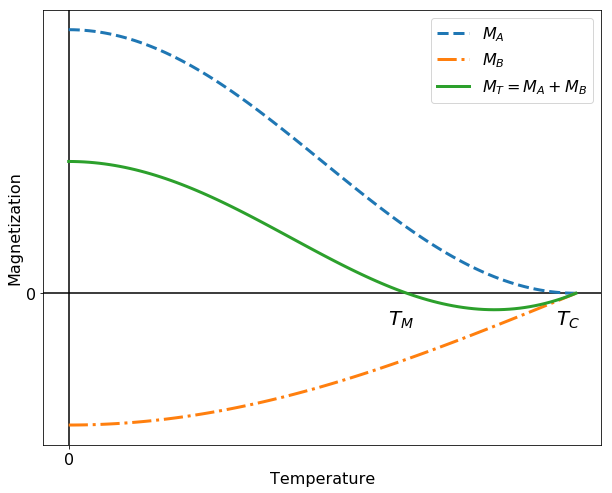

In [33]:
M_A = 0.5 * (np.cos(np.pi * T) + 1)
M_B = - 0.5 * np.cos(np.pi / 2 * T)
plt.figure(figsize=(10, 8))
plt.plot(T, M_A, '--', linewidth = 3)
plt.plot(T, M_B, '-.', linewidth = 3)
plt.plot(T, M_A + M_B, '-', linewidth = 3)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.xticks(np.array([0]), ('0'))
plt.yticks(np.array([0]), ('0'))
plt.grid(True, color = 'k', linewidth = 1.5)
plt.text(0.63, -0.12, r'$T_M$', fontsize = 20)
plt.text(0.96, -0.12, r'$T_C$', fontsize = 20)
plt.legend(['$M_A$', '$M_B$', '$M_T = M_A + M_B$'])
plt.rcParams.update({'font.size': 20})
#plt.savefig("ferrimagnetism.eps", dpi = 300, format = 'eps')
plt.show()

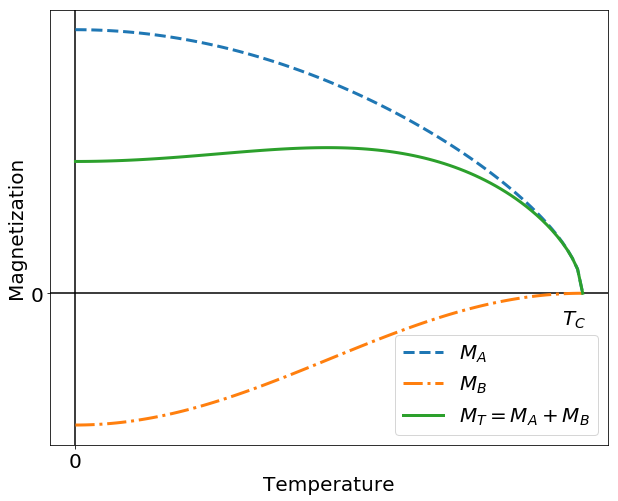

In [34]:
M_A = 0.6 * np.sqrt(1 - T ** 2) + 0.4 * np.cos(np.pi / 2 *T)
M_B = - 0.25 * (np.cos(np.pi * T) + 1)
plt.figure(figsize=(10, 8))
plt.plot(T, M_A, '--', linewidth = 3)
plt.plot(T, M_B, '-.', linewidth = 3)
plt.plot(T, M_A + M_B, '-', linewidth = 3)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.xticks(np.array([0]), ('0'))
plt.yticks(np.array([0]), ('0'))
plt.grid(True, color = 'k', linewidth = 1.5)
#plt.text(0.63, -0.12, r'$T_M$', fontsize = 20)
plt.text(0.96, -0.12, r'$T_C$', fontsize = 20)
plt.legend(['$M_A$', '$M_B$', '$M_T = M_A + M_B$'])
plt.rcParams.update({'font.size': 20})
plt.savefig("ferrimagnetism.eps", dpi = 300, format = 'eps')
plt.show()

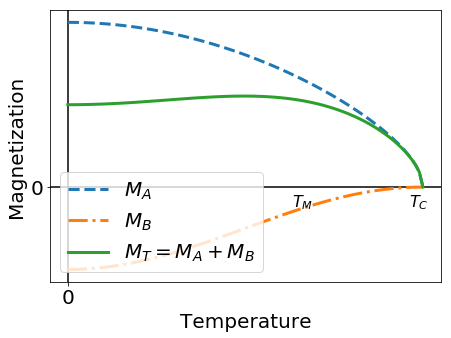

In [35]:
plt.figure(figsize=(7, 5))
plt.plot(T, M_A, '--', linewidth = 3)
plt.plot(T, M_B, '-.', linewidth = 3)
plt.plot(T, M_A + M_B, '-', linewidth = 3)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.xticks(np.array([0]), ('0'))
plt.yticks(np.array([0]), ('0'))
plt.grid(True, color = 'k', linewidth = 1.5)
plt.text(0.63, -0.12, r'$T_M$', fontsize = 16)
plt.text(0.96, -0.12, r'$T_C$', fontsize = 16)
plt.legend(['$M_A$', '$M_B$', '$M_T = M_A + M_B$'])
plt.rcParams.update({'font.size': 16})
plt.savefig("ferrimagnetism.eps", dpi = 300, format = 'eps')
plt.show()

In [133]:
def circular_polarized(z, sigma, wavelength):
    '''
    '''
    theta = 2 * np.pi / wavelength * z * sigma
    (x, y) = (np.cos(theta), np.sin(theta))
    return (x, y)

def gaussian_shape(z, z0, width):
    '''
    '''
    sigma = width / (2 * np.sqrt(2 * np.log(2)))
    f = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(((z - z0) / sigma)**2 * -0.5)
    return f

def circular_polarized_pulse(z, sigma, wavelength, z0, width, x0, y0):
    '''
    '''
    (dx, dy) = circular_polarized(z, sigma, wavelength)
    f = gaussian_shape(z, z0, width)
    (x, y) = (x0 + f * dx, y0 + f * dy)
    return (x, y)

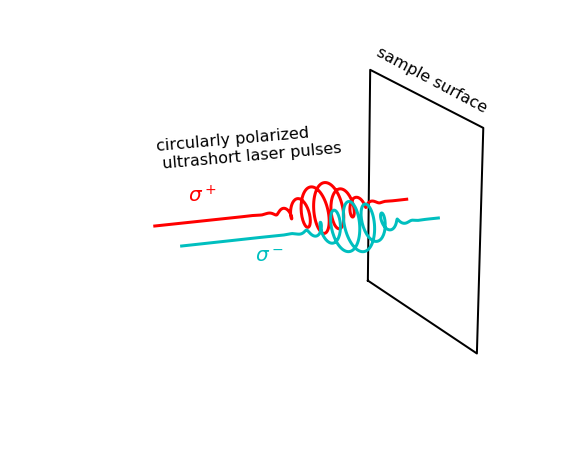

In [199]:
z = np.linspace(0, 30, 1000)
(x1, y1) = circular_polarized_pulse(z, +1, 1.8, 10, 6, -0.2, 0)
(x2, y2) = circular_polarized_pulse(z, -1, 1.8, 10, 6, +0.2, 0)
(ssx, ssy, ssz) = (np.array([0, 0, 0, 0, 0]), np.array([-0.7, 0.7, 0.7, -0.7, -0.7]), np.array([-0.7, -0.7, 0.7, 0.7, -0.7]))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot(ssx, ssy, ssz, color = 'k', linewidth = 2)
ax.plot(z, x1, y1, color = 'r', linewidth = 3)
ax.plot(z, x2, y2, color = 'c', linewidth = 3)
ax.text(30, 0.3, 0.3, '$\sigma^+$', color = 'r', fontsize = 20)
ax.text(25, 0.6, 0, '$\sigma^-$', color = 'c', fontsize = 20)
ax.text(0, -0.65, 0.8, 'sample surface', zdir = (-1.6, 1, 0), color = 'k', fontsize = 16)
ax.text(26, -0.7, 0.3, 'circularly polarized\n ultrashort laser pulses', zdir = (1, -0.005, 0), color = 'k', fontsize = 16)
ax.view_init(elev=20, azim=68)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.axis('off')
#plt.savefig("double-pulses-setup.eps", dpi = 300, format = 'eps')
plt.show()

In [ ]:
def pulse_shape(shape, parameters):
    return

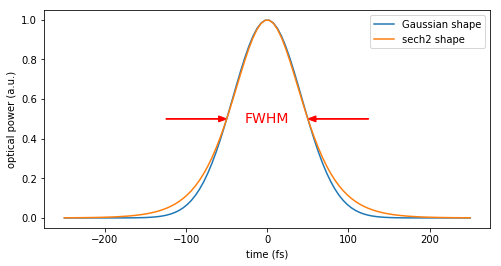

In [121]:
t = np.linspace(-250, 250, 100)

plt.figure(figsize=(8, 4))
plt.plot(t, np.exp(-t**2/(100/1.665)**2)) # Gaussian FWHM = 1.665
plt.plot(t, 1 / np.cosh(t/100*1.763)**2) # sech2 FWHM = 1.763

plt.arrow(125, 0.5, -75, 0, color='r', length_includes_head=True, head_width=0.03, head_length=10)
plt.arrow(-125, 0.5, 75, 0, color='r', length_includes_head=True, head_width=0.03, head_length=10)
plt.text(0, 0.5, 'FWHM', color='r', fontsize=14, horizontalalignment='center', verticalalignment='center')

plt.xlabel('time (fs)')
plt.ylabel('optical power (a.u.)')
plt.legend(['Gaussian shape', 'sech2 shape'])

plt.savefig("ultrafast-pulses-FWHM.eps", dpi = 300, format = 'eps')

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


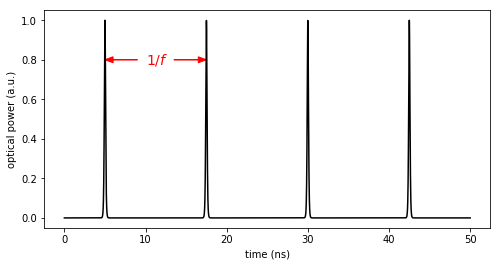

In [120]:
def I(t, tau, delay):
    return 1 / np.cosh((t-delay) / tau)**2 + 1 / np.cosh((t-delay-T) / tau)**2 + 1 / np.cosh((t-delay-T*2) / tau)**2 + 1 / np.cosh((t-delay-T*3) / tau)**2

t = np.linspace(0, 50, 5000)
T = 12.5
plt.figure(figsize=(8, 4))
plt.plot(t, I(t, 0.1, 5), 'k')

plt.arrow(13.5, 0.8, 4, 0, color='r', length_includes_head=True, head_width=0.03, head_length=1)
plt.arrow(9, 0.8, -4, 0, color='r', length_includes_head=True, head_width=0.03, head_length=1)
plt.text(10.1, 0.78, '$1/f$', color='r', fontsize=14)

plt.xlabel('time (ns)')
plt.ylabel('optical power (a.u.)')

plt.savefig("ultrafast-pulses-sequence.eps", dpi = 300, format = 'eps')
plt.show()

In [11]:
x = np.arccosh(np.sqrt(2))

In [14]:
2 * x

1.7627471740390863

In [12]:
1 / np.cosh(x)**2

0.4999999999999999

In [19]:
2*np.sqrt(np.log(2))

1.6651092223153954

In [20]:
1 / 8e7

1.25e-08

In [122]:
100e-15/12.5e-9

8.000000000000001e-06

In [124]:
365 * 24 * 3600 * 8e-6 / 60

4.2048

In [131]:
2.5 / 8e6 / 100e-15 * 0.94 / np.pi / (5e-6)**2

3.74014116265954e+16

In [149]:
def gaussian_envelope(t, t0, width):
    sigma = width / 1.665
    return np.exp(-((t - t0) / sigma)**2)

def carrier(t, wavelength):
    omega = 2*np.pi * 3e8 / (wavelength * 1e-9) / 1e15
    return np.sin(omega*t)

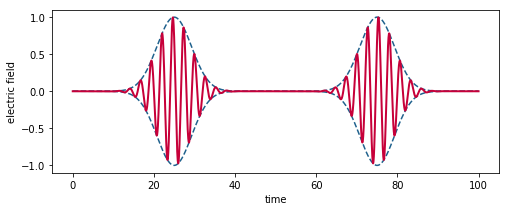

In [181]:
t = np.linspace(0, 100, 5000)

plt.figure(figsize=(8, 3))
plt.plot(t, (gaussian_envelope(t, 25, 10) + gaussian_envelope(t, 75, 10)), '--', color='#1F618D')
plt.plot(t, -(gaussian_envelope(t, 25, 10) + gaussian_envelope(t, 75, 10)), '--', color='#1F618D')
plt.plot(t, (gaussian_envelope(t, 25, 10) + gaussian_envelope(t, 75, 10))*carrier(t, 800), color='#C70039', linewidth=2)

plt.xlabel('time')
plt.ylabel('electric field')

plt.savefig("ultrafast-shape.eps", dpi = 300, format = 'eps', bbox_inches='tight')

plt.show()

In [204]:
t = np.linspace(0, 50, 5000)
I = gaussian_envelope(t, 25, 10)*carrier(t, 800)

In [205]:
# Fast fourier transform
N = len(t)
A = np.fft.fft(I) / N
f = np.fft.fftfreq(t.shape[-1], t[1])
f = f[range(int(N/2))]
A = A[range(int(N/2))]

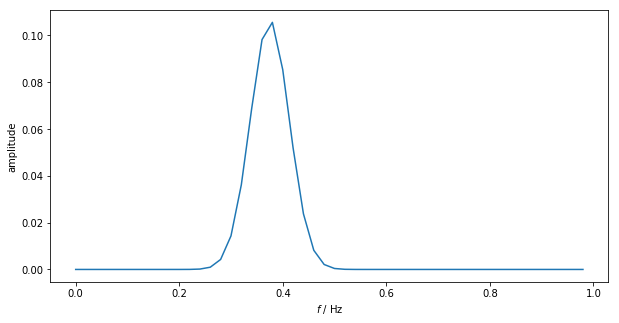

In [206]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f[0:50], np.absolute(A)[0:50])
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()